In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use("ggplot")

df_demo = pd.read_csv("../data/raw/prolific_export_6183a21728854d61cc238fc8.csv")

df = pd.read_csv("../data/raw/pilot-1-deception-2022-05-14.csv")

df = df[df['participant.finished'] ==  1].copy().reset_index()

df = pd.merge(df_demo, df, left_on='participant_id', right_on='participant.label')

decision_cols = [col for col in df if col.endswith('decision')]

df[decision_cols] = df[decision_cols].replace("A", 1).replace("B", 0)

In [3]:
strategy_schedule = [18, 14, 12, 10, 8, 6, 6]

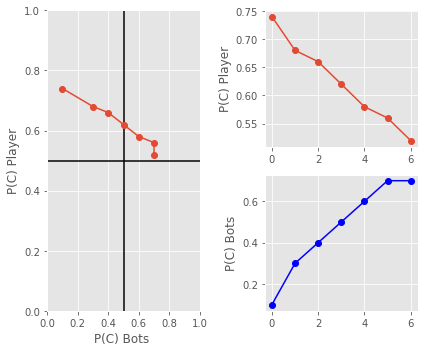

In [4]:
mean_round = df[decision_cols].mean().values
plt.figure(figsize=(6, 5))
plt.subplot(2, 2, 2)
plt.plot(mean_round, marker='o')
plt.ylabel("P(C) Player")

plt.subplot(2, 2, 4)
plt.plot(range(7), [1-n/20 for n in strategy_schedule], marker='o', color='blue')
plt.ylabel("P(C) Bots")

plt.subplot(1, 2, 1)
plt.plot([1-n/20 for n in strategy_schedule], mean_round, marker='o')
plt.hlines(0.5, 0, 1, color='black')
plt.vlines(0.5, 0, 1, color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("P(C) Bots ")
plt.ylabel("P(C) Player")
plt.tight_layout()

In [5]:
df_before = df[decision_cols[:3]].mean(1)
df_after = df[decision_cols[4:]].mean(1)


weak_herding_players = df_after > df_before
pure_herding_players = (df_before < 0.5) & (df_after > 0.5) # follow majority

# rational_players = df_after < df_before
rational_players = (df_before > 0.5) & (df_after < 0.5) # follow minority

primarily_c_players = (df_before > 0.5) & (df_after > 0.5)


rational_cooperating_players = primarily_c_players & (df_before >= df_after)
herding_cooperating_players = primarily_c_players & (df_before < df_after)

primarily_d_players = (df_before < 0.5) & (df_after < 0.5)
rational_defecting_players = primarily_d_players & (df_before >= df_after)
herding_defecting_players = primarily_d_players & (df_before < df_after)

print(f"""
- Rational: {rational_players.mean():0.0%}
- Pure Herders: {pure_herding_players.mean():0.0%}
- Cooperators: {primarily_c_players.mean():0.0%}
\t- Rational: {rational_cooperating_players.mean():0.0%}
\t- Herding: {herding_cooperating_players.mean():0.0%}
- Defectors: {primarily_d_players.mean():0.0%}
\t- Rational: {rational_defecting_players.mean():0.0%}
\t- Herding: {herding_defecting_players.mean():0.0%}

Herding: {pure_herding_players.mean():0.0%} to {weak_herding_players.mean():0.0%}
""".strip())

- Rational: 38%
- Pure Herders: 12%
- Cooperators: 44%
	- Rational: 26%
	- Herding: 18%
- Defectors: 6%
	- Rational: 6%
	- Herding: 0%

Herding: 12% to 30%


<AxesSubplot:>

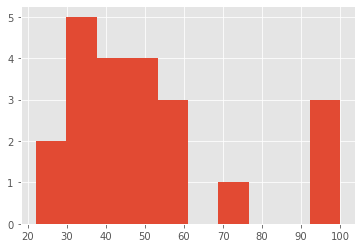

In [6]:
df[primarily_c_players]['bret.1.player.boxes_collected'].hist()

<AxesSubplot:>

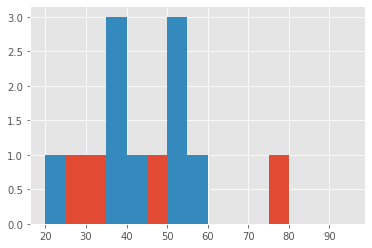

In [7]:
df[rational_cooperating_players]['bret.1.player.boxes_collected'].hist(bins=range(20, 100, 5))
df[herding_cooperating_players]['bret.1.player.boxes_collected'].hist(bins=range(20, 100, 5))

<AxesSubplot:>

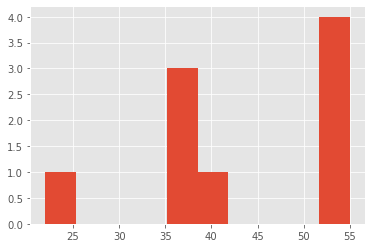

In [8]:
df[herding_cooperating_players]['bret.1.player.boxes_collected'].hist()

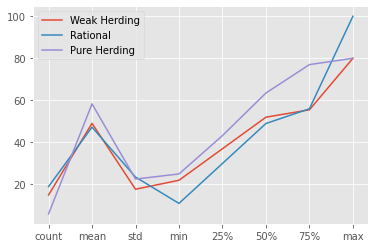

In [9]:
ax = df[weak_herding_players]['bret.1.player.boxes_collected'].describe().plot(label='Weak Herding')
df[rational_players]['bret.1.player.boxes_collected'].describe().plot(ax=ax, label='Rational')
df[pure_herding_players]['bret.1.player.boxes_collected'].describe().plot(ax=ax, label='Pure Herding')
# df[primarily_d_players]['bret.1.player.boxes_collected'].describe().plot(ax=ax, label='D players')
plt.legend()

In [10]:
def plot_player_decision(player_id, **plotargs):
    df[decision_cols].iloc[player_id].plot(marker='x', **plotargs)
    plt.xticks(range(8), range(1, 9))
    plt.vlines(3, 0, 1, color='red')
    plt.legend()

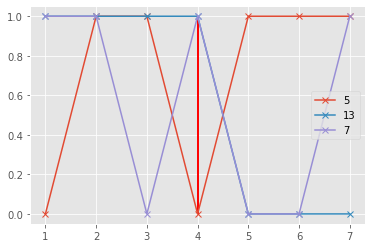

In [11]:
plot_player_decision(5)
plot_player_decision(13)
plot_player_decision(7)

In [12]:
time_columns = [b for b in df.columns if 'player.time_spent' in b]

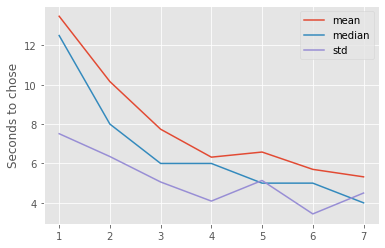

In [13]:
ax = df[time_columns].mean().plot(label='mean')
df[time_columns].median().plot(label='median')
df[time_columns].std().plot(label='std')
# df[time_columns].max().plot(label='max')
# df[time_columns].min().plot(label='min')
plt.ylabel("Seconds to chose")
ax.set_xticklabels(range(9))
plt.legend()

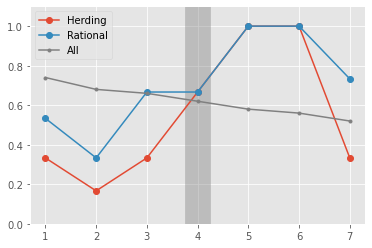

In [14]:
ax = df[pure_herding_players][decision_cols].mean().plot(label='Herding', marker='o')
df[weak_herding_players][decision_cols].mean().plot(label='Rational', marker='o')
df[decision_cols].mean().plot(ax=ax, label='All', marker='.', color='gray')
plt.ylim(0, 1.1)
plt.axvspan(2.75, 3.25, 0, 1.1, color='gray', alpha=.4)
ax.set_xticklabels(range(9))
plt.legend()

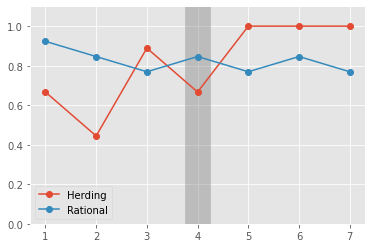

In [15]:
ax = df[herding_cooperating_players][decision_cols].mean().plot(label='Herding', marker='o')
df[rational_cooperating_players][decision_cols].mean().plot(label='Rational', marker='o')
plt.ylim(0, 1.1)
plt.axvspan(2.75, 3.25, 0, 1.1, color='gray', alpha=.4)
ax.set_xticklabels(range(9))
plt.legend()

In [16]:
df

,session_id,participant_id,status,started_datetime,completed_date_time,time_taken,age,num_approvals,num_rejections,prolific_score,...,debrief.1.player.payoff,debrief.1.player.debrief,debrief.1.player.debrief_2,debrief.1.group.id_in_subsession,debrief.1.subsession.round_number,thanks.1.player.id_in_group,thanks.1.player.role,thanks.1.player.payoff,thanks.1.group.id_in_subsession,thanks.1.subsession.round_number
0,627e545da8e9809e868e7b33,6154463474d88dfc259ef4b8,APPROVED,2022-05-13 12:51:47.989000,2022-05-13 13:02:09.194000,621.205,59,174,1,100,...,0.0,majority,majority,1,1,2,NaN,0.0,1,1
1,627e54be239c45c9ed18a33f,5aa696af6219a30001c75d2a,APPROVED,2022-05-13 12:53:24.988000,2022-05-13 13:00:06.812000,401.824,41,605,9,98,...,0.0,only_c,sophisticated,1,1,3,NaN,0.0,1,1
2,627e54ca921a8f35239d34b4,604110b766dec601e73b5e77,APPROVED,2022-05-13 12:53:30.683000,2022-05-13 13:01:13.500000,462.817,27,270,1,100,...,0.0,sophisticated,only_c,1,1,4,NaN,0.0,1,1
3,627e54f58b41c3ed9d197fbf,60d5d8b28ee97cee26819139,APPROVED,2022-05-13 12:54:21.063000,2022-05-13 13:01:59.531000,458.468,20,187,0,100,...,0.0,only_d,only_c,1,1,5,NaN,0.0,1,1
4,627e54f63927922c544f0430,6103c202ac90798100004f6c,APPROVED,2022-05-13 12:54:29.401000,2022-05-13 13:01:55.674000,446.273,20,95,1,100,...,0.0,only_d,only_c,1,1,6,NaN,0.0,1,1
5,627e551dcb1e1be3bfd78906,5df7f73b6d8cc7000a390c2e,APPROVED,2022-05-13 12:54:58.314000,2022-05-13 13:01:29.861000,391.547,32,329,3,99,...,0.0,only_c,majority,1,1,7,NaN,0.0,1,1
6,627e5531dc8ae6df0e60b457,5f315b1191f3f9621e93ead1,APPROVED,2022-05-13 12:55:13.069000,2022-05-13 13:10:30.392000,917.323,31,128,0,100,...,0.0,only_c,only_d,1,1,8,NaN,0.0,1,1
7,627e5568ba882c765ab2bbad,5f102f0212ea4f000a8ac9da,APPROVED,2022-05-13 12:56:08.669000,2022-05-13 13:03:55.436000,466.767,53,339,0,100,...,0.0,only_c,only_d,1,1,9,NaN,0.0,1,1
8,627e55994dac5dba4b229284,5b18deb1c9d3cb00011001cf,APPROVED,2022-05-13 12:57:02.074000,2022-05-13 13:05:57.565000,535.491,29,289,0,100,...,0.0,random,only_c,1,1,13,NaN,0.0,1,1
9,627e55bb375a00a9fb567d8d,59ee565b6100f9000194abbf,APPROVED,2022-05-13 12:57:31.922000,2022-05-13 13:06:43.404000,551.482,55,294,3,99,...,0.0,majority,only_c,1,1,10,NaN,0.0,1,1


In [17]:
df[['bret.1.player.payoff', 'bret.1.player.boxes_collected']].describe()

,bret.1.player.payoff,bret.1.player.boxes_collected
count,50.000000,50.000000
mean,15.580000,51.200000
std,21.517994,22.430846
min,0.000000,11.000000
25%,0.000000,36.000000
50%,0.000000,50.500000
75%,31.500000,60.500000
max,71.000000,100.000000


In [19]:
df[[c for c in df.columns if 'potential_payoff' in c][1:]].mean().describe()

count      6.000000
mean     104.693333
std       15.913258
min       83.680000
25%       93.160000
50%      105.040000
75%      118.600000
max      122.080000
dtype: float64

In [22]:
df[[c for c in df.columns if 'player.payoff' in c]].max(1)

0     108.0
1     104.0
2     108.0
3     140.0
4      92.0
5     100.0
6     108.0
7     100.0
8     120.0
9     100.0
10    100.0
11     96.0
12    104.0
13     96.0
14    108.0
15    108.0
16    100.0
17    100.0
18     92.0
19    108.0
20     92.0
21    120.0
22    140.0
23     96.0
24     92.0
25     96.0
26    100.0
27    108.0
28     96.0
29     60.0
30     92.0
31    108.0
32     92.0
33    140.0
34     92.0
35     96.0
36    100.0
37    108.0
38    108.0
39    108.0
40     92.0
41     96.0
42     96.0
43    120.0
44    104.0
45    108.0
46     92.0
47    100.0
48     60.0
49    108.0
dtype: float64

In [25]:
df[[c for c in df.columns if 'player.payoff' in c]].max(1).std()

14.661569924570193